In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [22]:
covid_df = pd.read_excel("corona value - 08-04-99.xlsx")
covid_df.columns = covid_df.iloc[1]
covid_df = covid_df.drop(covid_df.index[[0,1,2,3,4]]).reset_index().drop('index', axis=1)

# print(covid_df.describe(include='all'))
# print(covid_df)

In [23]:
cols=[i for i in covid_df.columns if i not in ["Gender"]]
for col in cols:
    covid_df[col]=pd.to_numeric(covid_df[col])
display(covid_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3481 entries, 0 to 3480
Columns: 102 entries, Age (yr) to No previous treatment
dtypes: float64(12), int64(89), object(1)
memory usage: 2.7+ MB


None

In [24]:
covid_df = covid_df.drop(covid_df.loc[:,'Lymp<1100':].columns, axis=1).dropna()
display(covid_df.info())
display(covid_df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2577 entries, 0 to 3479
Data columns (total 79 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Age (yr)                               2577 non-null   float64
 1   Gender                                 2577 non-null   object 
 2   pulse rate                             2577 non-null   float64
 3   respiratory rate                       2577 non-null   float64
 4   Tempreture                             2577 non-null   float64
 5   Height                                 2577 non-null   float64
 6   Weight                                 2577 non-null   float64
 7   BMI                                    2577 non-null   float64
 8   Systolic blood presure                 2577 non-null   float64
 9   Diastolic blood pressure               2577 non-null   float64
 10  sPO2%                                  2577 non-null   float64
 11  Resp

None

1,Age (yr),Gender,pulse rate,respiratory rate,Tempreture,Height,Weight,BMI,Systolic blood presure,Diastolic blood pressure,sPO2%,Respratory distress,Triage result,Duration of starting complaints,fever,chill,cough,sputum,dyspnea,chest pain,body pain,myalgia,arthralgia,fatigue,weakness,sweating,sore throat,throat dryness,headache,nose stiffness,Laryngitis,anosmia,dysgeusia,epistaxia,conjectivitis,anorexia,nausea/vomiting,diarrhea,abd pain,severe abd pain,bloody diarrhea,dysuria,ear pain,skin infection,cyanosis,decrease of consiousness,seizure,dowsiness,amnesia,without compalint,prolonged fever/dyspnea/cough,prolonged anorexia/nausea/vomiting,prolonged nausea/vomiting,prolonged fever/dyspnea,prolonged fever/dyspnea2,no prominent effect,diabetes melitus,hypertension,CHF,Respiratory disease,Renal failure,cirrhosis,hypothyroid,chemotherapy,cancer,organ transplantation,2nd yr of bone marrow transplantation,splenectomy,MTX intake,Prednisolone intake,Cyclophosphamide intake,other immunosuppression,pregnancy,delivery,HIV disease,Cardiovascular dis,non medical personnel,mediacl personnel,No risk factor
0,73.0,male,64.0,22.0,36.6,155.0,60.0,24.97,136.0,41.0,98.0,0.0,1,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,29.0,female,80.0,22.0,37.1,165.0,67.0,24.61,94.0,44.0,97.0,0.0,1,1.0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,34.0,female,102.0,22.0,37.2,170.0,53.0,18.34,114.0,47.0,96.0,0.0,1,1.0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,19.0,male,124.0,20.0,36.9,170.0,65.0,22.49,123.0,50.0,98.0,0.0,1,4.0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6,13.0,female,89.0,18.0,36.3,155.0,54.0,22.48,115.0,51.0,96.0,1.0,1,1.0,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3474,52.0,female,120.0,19.0,36.0,173.0,85.0,28.40,156.0,110.0,97.0,0.0,3,2.0,1,1,1,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3475,75.0,female,92.0,18.0,37.0,160.0,50.0,19.53,183.0,117.0,92.0,0.0,3,1.0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3477,39.0,female,125.0,23.0,37.0,162.0,106.0,40.39,185.0,125.0,90.0,0.0,3,1.0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3478,56.0,male,150.0,24.0,35.0,168.0,65.0,23.03,231.0,148.0,90.0,0.0,3,1.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
covid_df[covid_df.columns].corr()['Triage result'][:]

1
Age (yr)                                 0.151446
pulse rate                               0.047508
respiratory rate                         0.158070
Tempreture                               0.028854
Height                                  -0.057116
Weight                                   0.018608
BMI                                      0.055936
Systolic blood presure                   0.029622
Diastolic blood pressure                 0.005987
sPO2%                                   -0.236879
Respratory distress                      0.183566
Triage result                            1.000000
Duration of starting complaints         -0.097245
fever                                    0.196347
chill                                    0.204358
cough                                    0.167014
sputum                                   0.042490
dyspnea                                  0.157203
chest pain                               0.097533
body pain                                0.14061

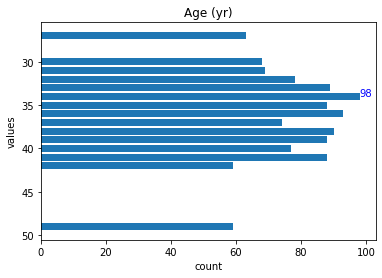

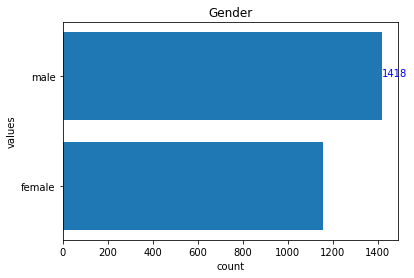

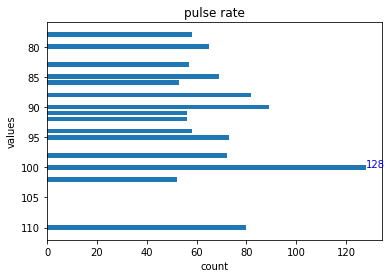

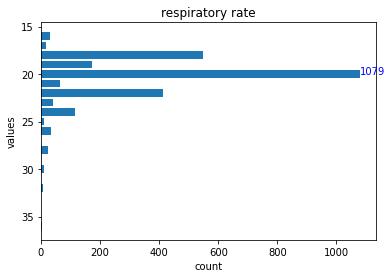

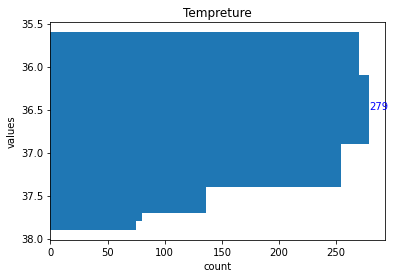

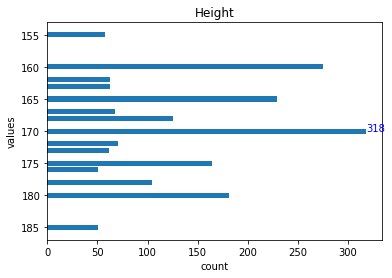

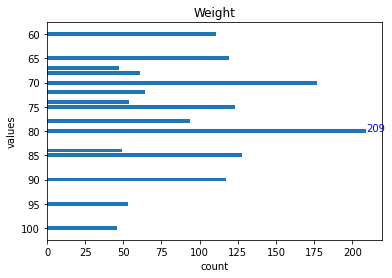

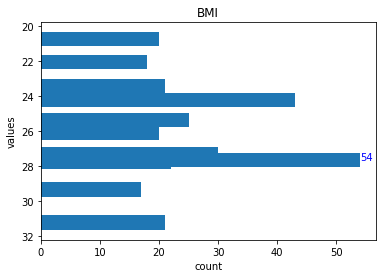

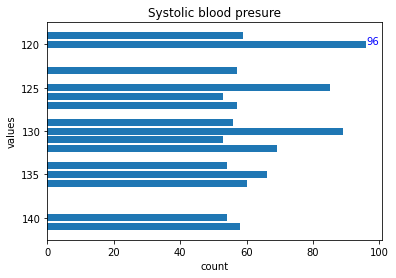

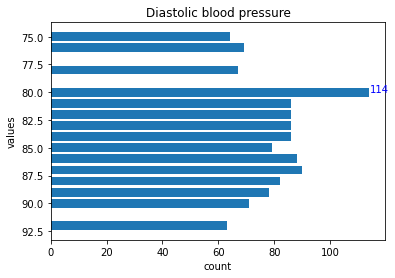

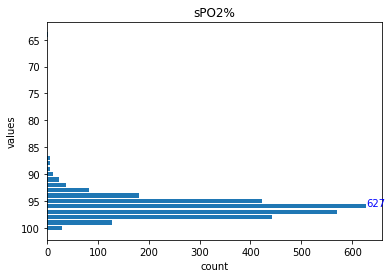

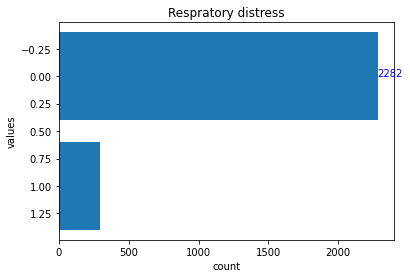

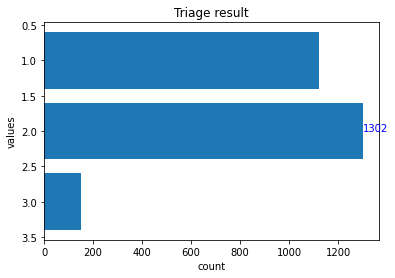

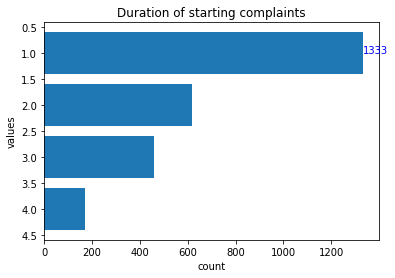

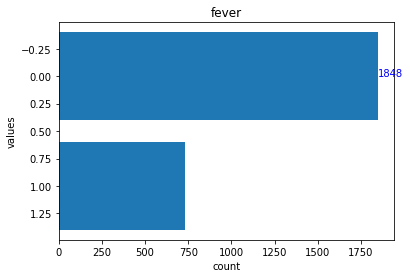

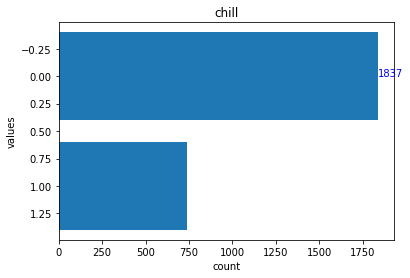

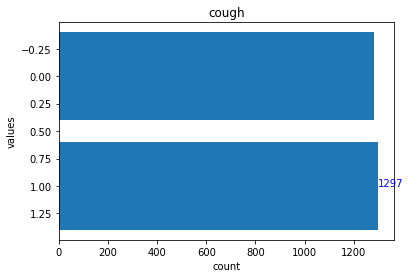

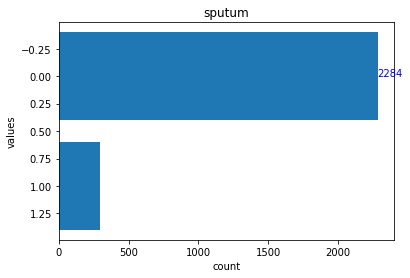

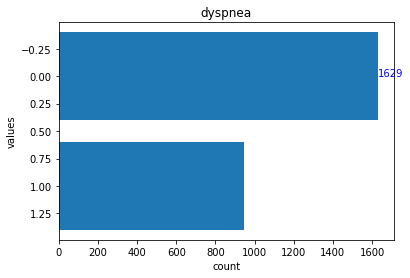

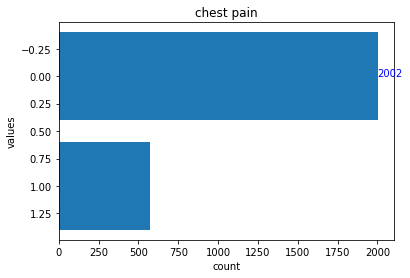

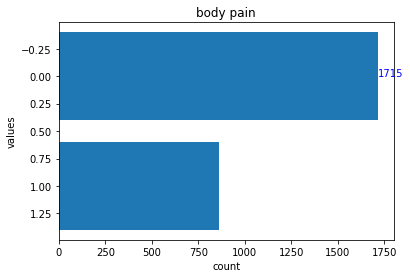

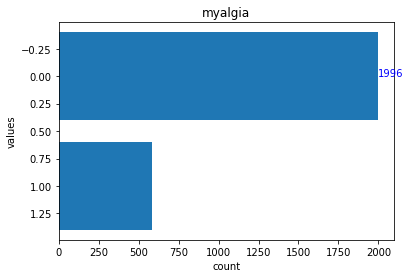

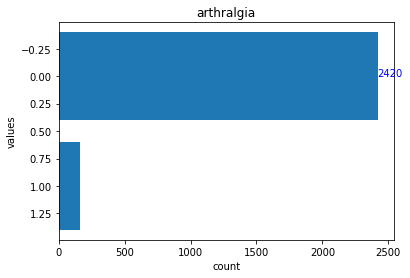

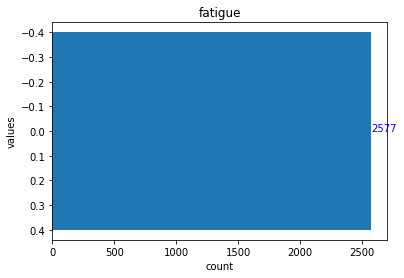

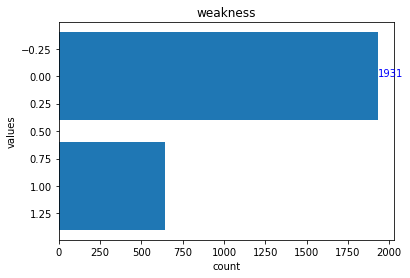

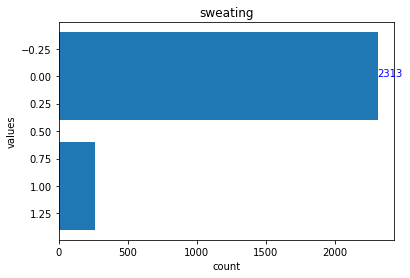

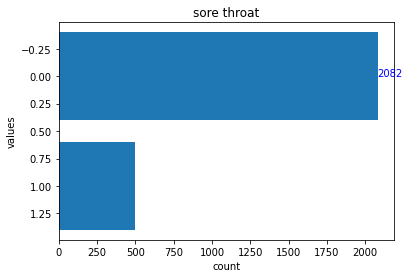

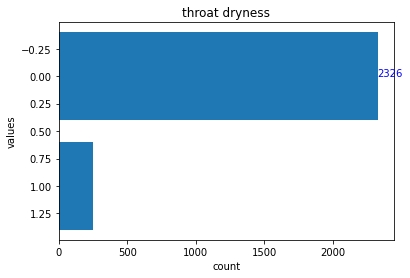

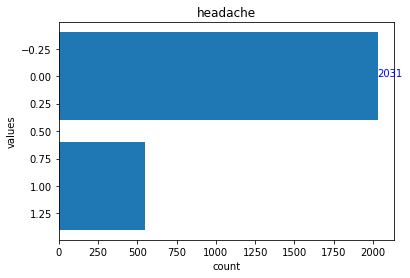

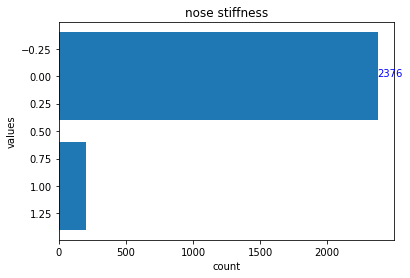

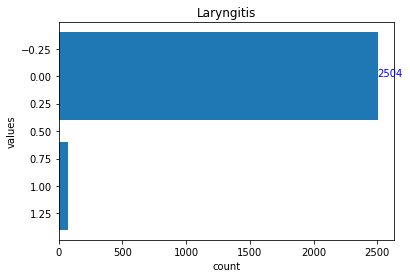

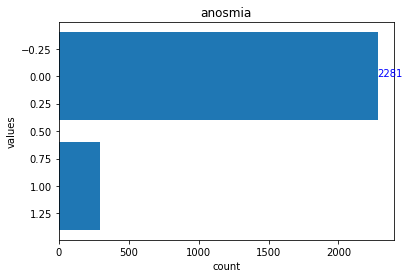

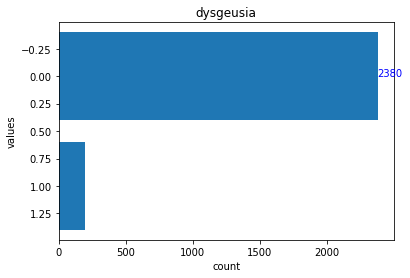

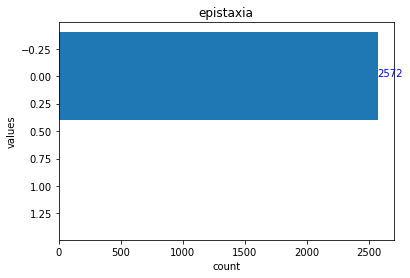

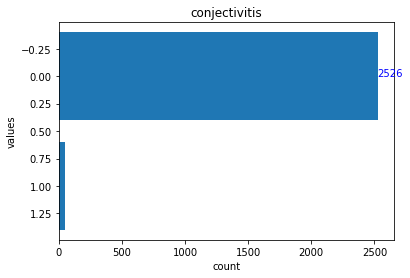

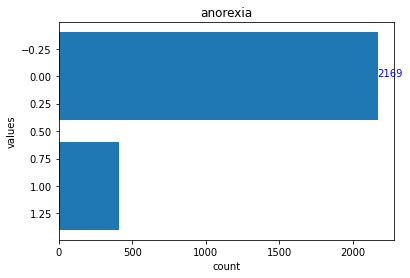

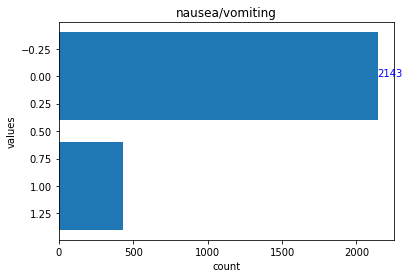

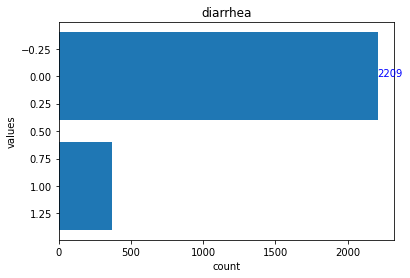

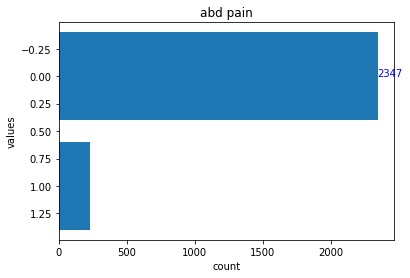

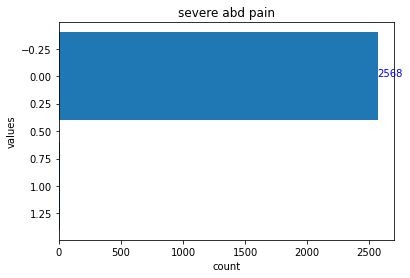

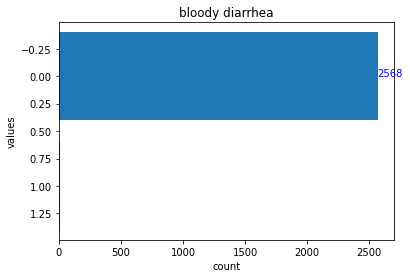

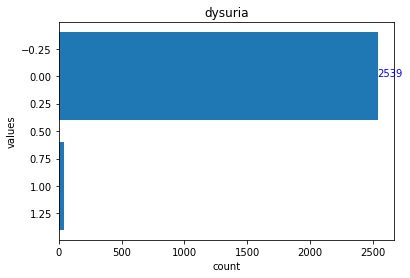

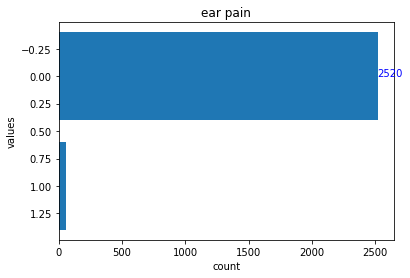

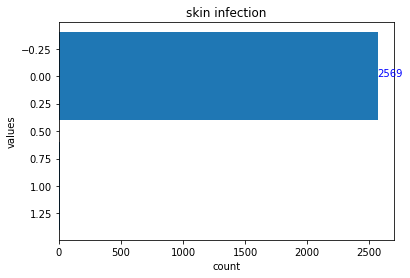

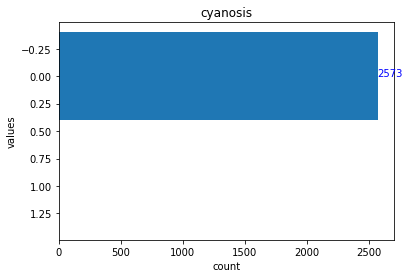

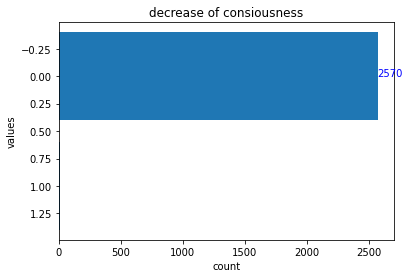

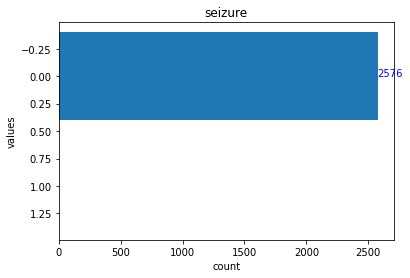

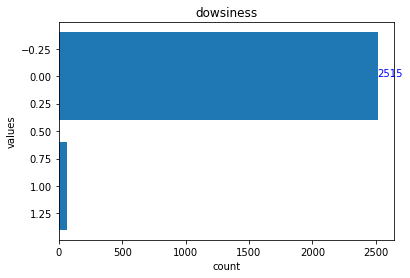

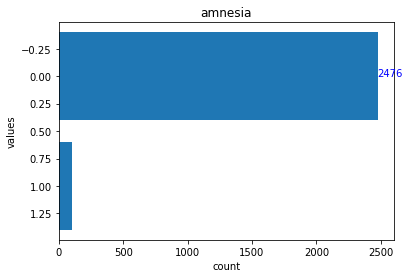

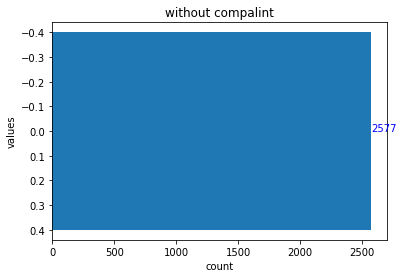

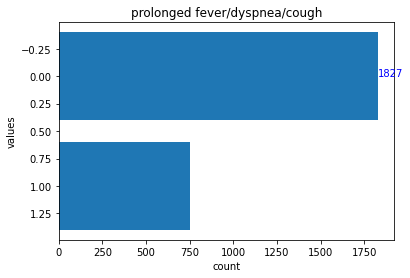

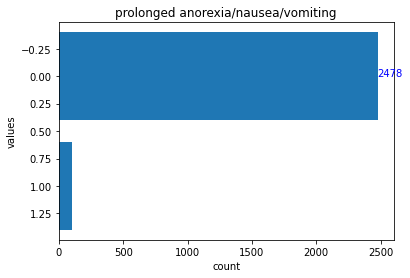

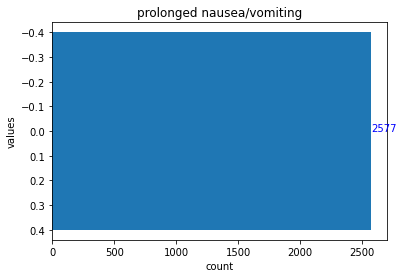

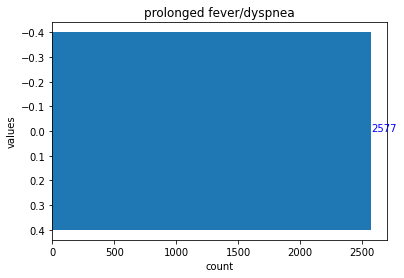

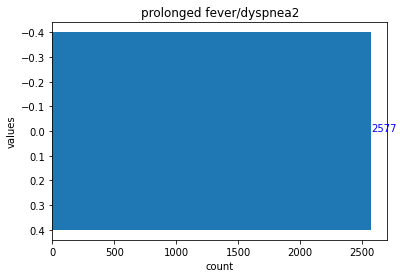

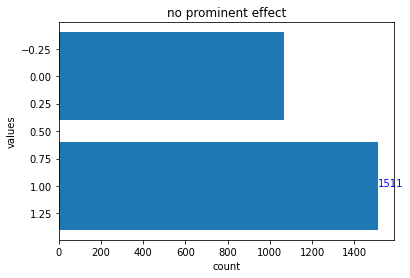

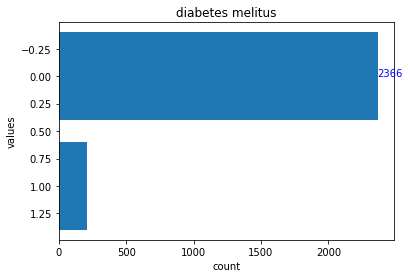

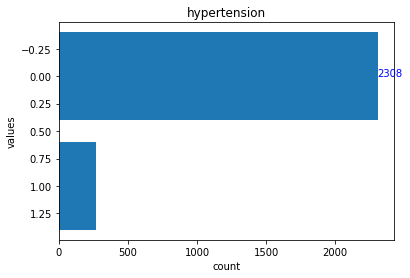

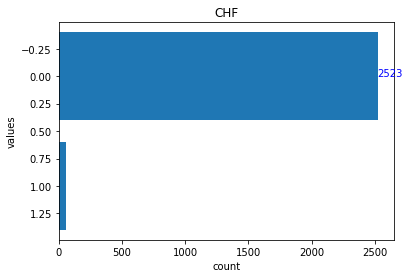

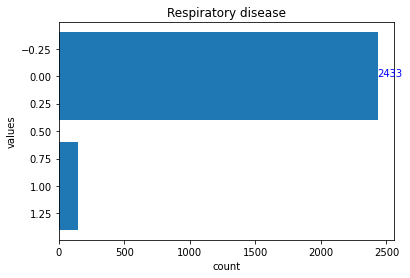

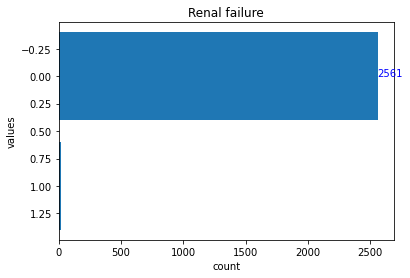

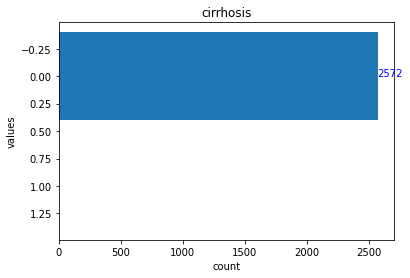

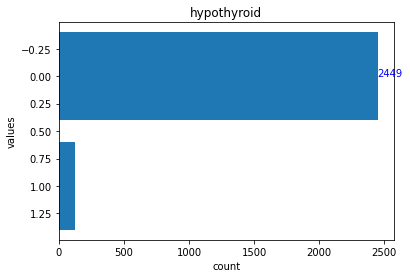

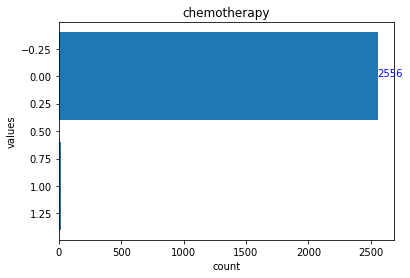

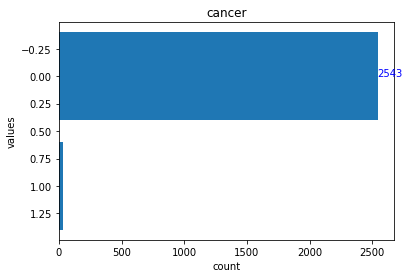

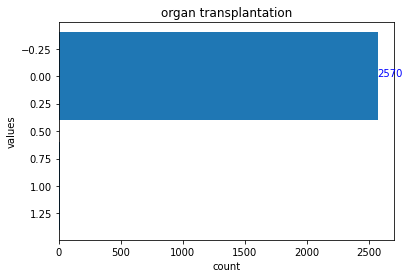

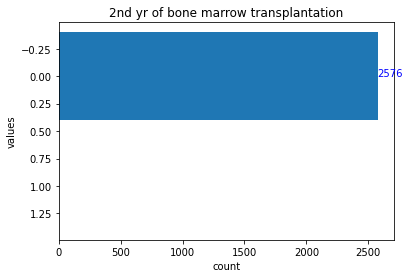

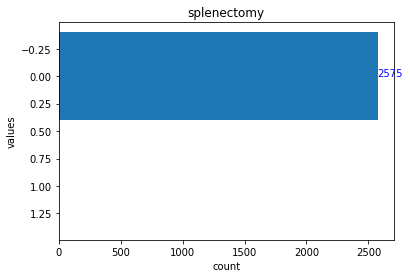

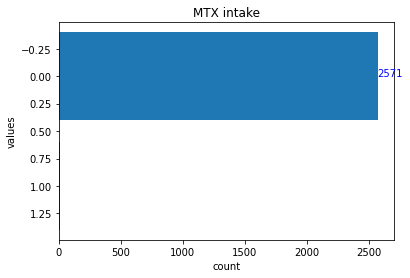

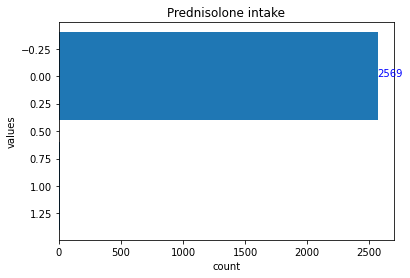

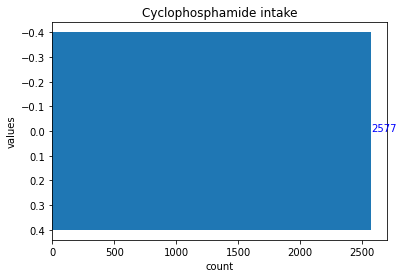

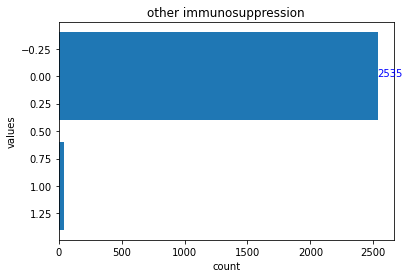

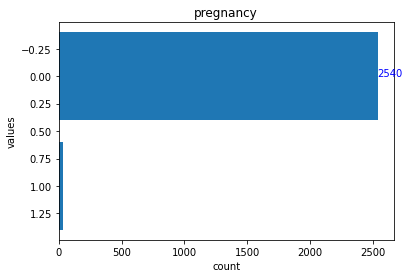

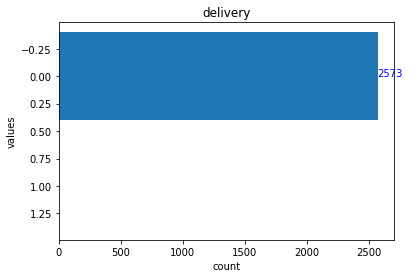

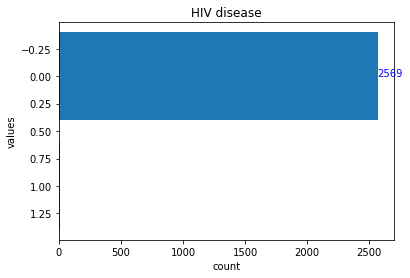

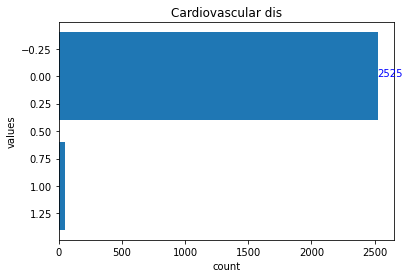

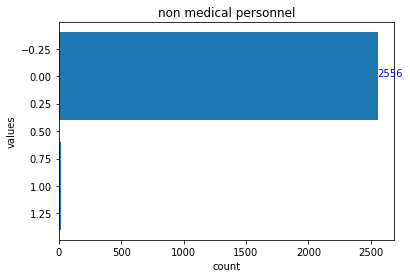

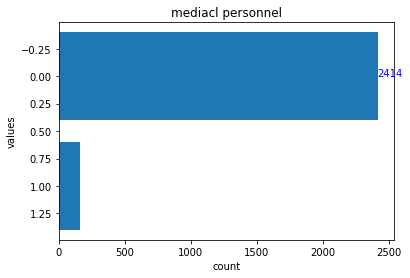

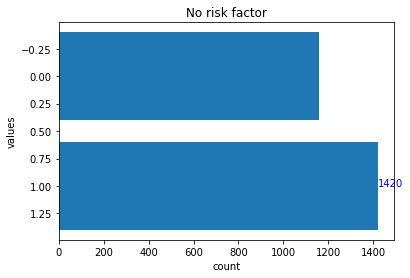

In [26]:
from collections import Counter
for column in covid_df.columns:
    column_count = Counter(list(covid_df[column].values))
    x, y = zip(*column_count.most_common(15))
    plt.figure()
    plt.barh(x, y)
    for i, val in enumerate(y):
        plt.annotate(val, (y[i], x[i]), color='b')
        plt.gca().invert_yaxis()
        plt.title(column)
        plt.ylabel('values')
        plt.xlabel('count')
        plt.grid(False, axis='y')
        plt.show()
        break



In [28]:
display(covid_df.describe())

1,Age (yr),pulse rate,respiratory rate,Tempreture,Height,Weight,BMI,Systolic blood presure,Diastolic blood pressure,sPO2%,Respratory distress,Triage result,Duration of starting complaints,fever,chill,cough,sputum,dyspnea,chest pain,body pain,myalgia,arthralgia,fatigue,weakness,sweating,sore throat,throat dryness,headache,nose stiffness,Laryngitis,anosmia,dysgeusia,epistaxia,conjectivitis,anorexia,nausea/vomiting,diarrhea,abd pain,severe abd pain,bloody diarrhea,dysuria,ear pain,skin infection,cyanosis,decrease of consiousness,seizure,dowsiness,amnesia,without compalint,prolonged fever/dyspnea/cough,prolonged anorexia/nausea/vomiting,prolonged nausea/vomiting,prolonged fever/dyspnea,prolonged fever/dyspnea2,no prominent effect,diabetes melitus,hypertension,CHF,Respiratory disease,Renal failure,cirrhosis,hypothyroid,chemotherapy,cancer,organ transplantation,2nd yr of bone marrow transplantation,splenectomy,MTX intake,Prednisolone intake,Cyclophosphamide intake,other immunosuppression,pregnancy,delivery,HIV disease,Cardiovascular dis,non medical personnel,mediacl personnel,No risk factor
count,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.0,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.0,2577.000000,2577.000000,2577.0,2577.0,2577.0,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.0,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000
mean,42.297633,95.556073,20.293364,36.720908,169.762127,78.076834,27.035797,132.462941,84.734187,96.127280,0.114474,1.622429,1.791230,0.282887,0.287156,0.503298,0.113698,0.367870,0.223128,0.334497,0.225456,0.060924,0.0,0.250679,0.102445,0.192084,0.097400,0.211874,0.077998,0.028328,0.114862,0.076445,0.001940,0.019790,0.158324,0.168413,0.142802,0.089251,0.003492,0.003492,0.014746,0.022119,0.003104,0.001552,0.002716,0.000388,0.024059,0.039193,0.0,0.291036,0.038417,0.0,0.0,0.0,0.586341,0.081878,0.104385,0.020955,0.055879,0.006209,0.001940,0.049670,0.008149,0.013194,0.002716,0.000388,0.000776,0.002328,0.003104,0.0,0.016298,0.014358,0.001552,0.003104,0.020179,0.008149,0.063252,0.551028
std,14.555349,37.196526,2.318758,0.631099,9.222643,15.807322,4.765007,18.179859,13.148532,2.095938,0.318448,0.593581,0.955875,0.450489,0.452523,0.500086,0.317506,0.482319,0.416424,0.471906,0.417963,0.239236,0.0,0.433488,0.303291,0.394015,0.296559,0.408716,0.268220,0.165939,0.318918,0.265761,0.044014,0.139307,0.365115,0.374305,0.349938,0.285161,0.059005,0.059005,0.120557,0.147098,0.055641,0.039375,0.052058,0.019699,0.153262,0.194091,0.0,0.454328,0.192237,0.0,0.0,0.0,0.492584,0.274232,0.305819,0.143260,0.229732,0.078566,0.044014,0.217305,0.089921,0.114125,0.052058,0.019699,0.027853,0.048205,0.055641,0.0,0.126644,0.118984,0.039375,0.055641,0.140638,0.089921,0.243463,0.497486
min,5.000000,50.000000,12.000000,34.800000,132.000000,35.000000,15.430000,79.000000,38.000000,64.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.

In [29]:
from collections import Counter
for column in covid_df.columns:
    column_count = Counter(list(covid_df[column].values))
    x, y = zip(*column_count.most_common(15))
#     print(x, len(x), y, len(y))
    if (len(y) == 2 and (y[0] >= 10 * y[1] or y[1] >= 10 * y[0])) or len(y) == 1:
        covid_df = covid_df.drop(column, axis=1)

display(covid_df.describe())
print(len(covid_df.columns))

1,Age (yr),pulse rate,respiratory rate,Tempreture,Height,Weight,BMI,Systolic blood presure,Diastolic blood pressure,sPO2%,Respratory distress,Triage result,Duration of starting complaints,fever,chill,cough,sputum,dyspnea,chest pain,body pain,myalgia,weakness,sweating,sore throat,throat dryness,headache,anosmia,anorexia,nausea/vomiting,diarrhea,prolonged fever/dyspnea/cough,no prominent effect,hypertension,No risk factor
count,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000
mean,42.297633,95.556073,20.293364,36.720908,169.762127,78.076834,27.035797,132.462941,84.734187,96.127280,0.114474,1.622429,1.791230,0.282887,0.287156,0.503298,0.113698,0.367870,0.223128,0.334497,0.225456,0.250679,0.102445,0.192084,0.097400,0.211874,0.114862,0.158324,0.168413,0.142802,0.291036,0.586341,0.104385,0.551028
std,14.555349,37.196526,2.318758,0.631099,9.222643,15.807322,4.765007,18.179859,13.148532,2.095938,0.318448,0.593581,0.955875,0.450489,0.452523,0.500086,0.317506,0.482319,0.416424,0.471906,0.417963,0.433488,0.303291,0.394015,0.296559,0.408716,0.318918,0.365115,0.374305,0.349938,0.454328,0.492584,0.305819,0.497486
min,5.000000,50.000000,12.000000,34.800000,132.000000,35.000000,15.430000,79.000000,38.000000,64.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,83.000000,19.000000,36.300000,163.000000,67.000000,23.880000,120.000000,76.000000,95.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,94.000000,20.000000,36.600000,170.000000,77.000000,26.570000,131.000000,84.000000,96.000000,0.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,51.000000,105.000000,22.000000,37.100000,176.000000,87.000000,29.700000,143.000000,93.000000,97.000000,0.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,98.000000,1400.000000,38.000000,39.800000,207.000000,150.000000,51.900000,231.000000,152.000000,100.000000,1.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


35


In [31]:
display(covid_df)
display(covid_df.describe())
display(covid_df.info())

1,Age (yr),Gender,pulse rate,respiratory rate,Tempreture,Height,Weight,BMI,Systolic blood presure,Diastolic blood pressure,sPO2%,Respratory distress,Triage result,Duration of starting complaints,fever,chill,cough,sputum,dyspnea,chest pain,body pain,myalgia,weakness,sweating,sore throat,throat dryness,headache,anosmia,anorexia,nausea/vomiting,diarrhea,prolonged fever/dyspnea/cough,no prominent effect,hypertension,No risk factor
0,73.0,male,64.0,22.0,36.6,155.0,60.0,24.97,136.0,41.0,98.0,0.0,1,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,29.0,female,80.0,22.0,37.1,165.0,67.0,24.61,94.0,44.0,97.0,0.0,1,1.0,0,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0
4,34.0,female,102.0,22.0,37.2,170.0,53.0,18.34,114.0,47.0,96.0,0.0,1,1.0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1
5,19.0,male,124.0,20.0,36.9,170.0,65.0,22.49,123.0,50.0,98.0,0.0,1,4.0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0
6,13.0,female,89.0,18.0,36.3,155.0,54.0,22.48,115.0,51.0,96.0,1.0,1,1.0,1,1,0,1,1,1,1,1,0,0,0,0,0,0,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3474,52.0,female,120.0,19.0,36.0,173.0,85.0,28.40,156.0,110.0,97.0,0.0,3,2.0,1,1,1,1,1,1,0,0,0,1,0,1,0,0,1,1,1,1,0,0,1
3475,75.0,female,92.0,18.0,37.0,160.0,50.0,19.53,183.0,117.0,92.0,0.0,3,1.0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0
3477,39.0,female,125.0,23.0,37.0,162.0,106.0,40.39,185.0,125.0,90.0,0.0,3,1.0,0,0,1,0,1,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1
3478,56.0,male,150.0,24.0,35.0,168.0,65.0,23.03,231.0,148.0,90.0,0.0,3,1.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


1,Age (yr),pulse rate,respiratory rate,Tempreture,Height,Weight,BMI,Systolic blood presure,Diastolic blood pressure,sPO2%,Respratory distress,Triage result,Duration of starting complaints,fever,chill,cough,sputum,dyspnea,chest pain,body pain,myalgia,weakness,sweating,sore throat,throat dryness,headache,anosmia,anorexia,nausea/vomiting,diarrhea,prolonged fever/dyspnea/cough,no prominent effect,hypertension,No risk factor
count,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000
mean,42.297633,95.556073,20.293364,36.720908,169.762127,78.076834,27.035797,132.462941,84.734187,96.127280,0.114474,1.622429,1.791230,0.282887,0.287156,0.503298,0.113698,0.367870,0.223128,0.334497,0.225456,0.250679,0.102445,0.192084,0.097400,0.211874,0.114862,0.158324,0.168413,0.142802,0.291036,0.586341,0.104385,0.551028
std,14.555349,37.196526,2.318758,0.631099,9.222643,15.807322,4.765007,18.179859,13.148532,2.095938,0.318448,0.593581,0.955875,0.450489,0.452523,0.500086,0.317506,0.482319,0.416424,0.471906,0.417963,0.433488,0.303291,0.394015,0.296559,0.408716,0.318918,0.365115,0.374305,0.349938,0.454328,0.492584,0.305819,0.497486
min,5.000000,50.000000,12.000000,34.800000,132.000000,35.000000,15.430000,79.000000,38.000000,64.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,83.000000,19.000000,36.300000,163.000000,67.000000,23.880000,120.000000,76.000000,95.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,94.000000,20.000000,36.600000,170.000000,77.000000,26.570000,131.000000,84.000000,96.000000,0.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,51.000000,105.000000,22.000000,37.100000,176.000000,87.000000,29.700000,143.000000,93.000000,97.000000,0.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,98.000000,1400.000000,38.000000,39.800000,207.000000,150.000000,51.900000,231.000000,152.000000,100.000000,1.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2577 entries, 0 to 3479
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age (yr)                         2577 non-null   float64
 1   Gender                           2577 non-null   object 
 2   pulse rate                       2577 non-null   float64
 3   respiratory rate                 2577 non-null   float64
 4   Tempreture                       2577 non-null   float64
 5   Height                           2577 non-null   float64
 6   Weight                           2577 non-null   float64
 7   BMI                              2577 non-null   float64
 8   Systolic blood presure           2577 non-null   float64
 9   Diastolic blood pressure         2577 non-null   float64
 10  sPO2%                            2577 non-null   float64
 11  Respratory distress              2577 non-null   float64
 12  Triage result       

None

# Seperating Target and Train 

In [39]:
rand = 42
target = covid_df['Triage result']
train = covid_df.drop('Triage result', axis=1)

# Over Sampling Imbalance Data

In [40]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
train, target = ros.fit_resample(train, target)
from collections import Counter
print(sorted(Counter(target).items()))

[(1, 1302), (2, 1302), (3, 1302)]


# Labeling Gender Column

In [41]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
covid_df['Gender']= label_encoder.fit_transform(covid_df['Gender']) 

# Applying Cut Off

In [33]:
def apply_cutoff_systolic(x):
    if x >= 140:
        return 1
    else:
        return 0
    
def apply_cutoff_dialic(x):
    if x >= 90:
        return 1
    else:
        return 0

covid_df['Systolic blood presure'] = covid_df['Systolic blood presure'].apply(apply_cutoff_systolic)
covid_df['Diastolic blood pressure'] = covid_df['Diastolic blood pressure'].apply(apply_cutoff_dialic)
display(covid_df['Systolic blood presure'], covid_df['Diastolic blood pressure'])

0       0
1       0
4       0
5       0
6       0
       ..
3474    1
3475    1
3477    1
3478    1
3479    1
Name: Systolic blood presure, Length: 2577, dtype: int64

0       0
1       0
4       0
5       0
6       0
       ..
3474    1
3475    1
3477    1
3478    1
3479    1
Name: Diastolic blood pressure, Length: 2577, dtype: int64

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, BayesianRidge, RidgeCV, LassoLars, \
    ElasticNet, TheilSenRegressor, ARDRegression, RANSACRegressor, HuberRegressor
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, VotingRegressor, AdaBoostRegressor


class ModelCreator:
    """
    Models Are; svr, knn, tree, logistic, linear, ridge, lasso, bayesian, ridgecv, LassoLars, ElasticNetو
    BaggingClassifier(base_estimator=estimator, n_estimators=number_of_estimator, max_features=0.5)
    Set test_split_available to split test and train
    """

    def __init__(self, x_train, y_train, test_split_available=False, test_size=0.1, shuffle=True, number_of_estimator=10, estimator=None, estimators=None, random_state=None):
        if test_split_available:
            self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(x_train, y_train,
                                                                                    test_size=test_size,
                                                                                    shuffle=shuffle,
                                                                                    random_state=random_state)
        else:
            self.x_test = x_train
            self.y_test = y_train
            self.x_train = x_train
            self.y_train = y_train
        self.y_predict_test = {}
        self.y_predict_train = {}
        self.models = {'svr': SVR(), 'knn': KNeighborsRegressor(), 'tree': DecisionTreeRegressor(),
                       'logistic': LogisticRegression(), 'linear': LinearRegression(), 'ridge': Ridge(),
                       'ridgecv': RidgeCV(), 'lasso': Lasso(), 'lassolars': LassoLars(alpha=0.1),
                       'bayesian': BayesianRidge(), 'ElasticNet': ElasticNet(),
                       'TheilSenRegressor': TheilSenRegressor(),
                       'ARDRegression': ARDRegression(), 'RANSACRegressor': RANSACRegressor(),
                       'HuberRegressor': HuberRegressor(), 'randomForest': RandomForestRegressor(n_estimators=50),
                       'boost': AdaBoostRegressor(random_state=0, n_estimators=100)}

        self.estimator = self.models[estimator]
        estimators_list = []
        for i in range(len(estimators)):
            estimators_list.append((estimators[i], self.models[estimators[i]]))

        self.models = {'svr': SVR(), 'knn': KNeighborsRegressor(), 'tree': DecisionTreeRegressor(),
                       'logistic': LogisticRegression(), 'linear': LinearRegression(), 'ridge': Ridge(),
                       'ridgecv': RidgeCV(), 'lasso': Lasso(), 'lassolars': LassoLars(alpha=0.1),
                       'bayesian': BayesianRidge(), 'ElasticNet': ElasticNet(),
                       'TheilSenRegressor': TheilSenRegressor(),
                       'ARDRegression': ARDRegression(), 'RANSACRegressor': RANSACRegressor(),
                       'HuberRegressor': HuberRegressor(), 'randomForest': RandomForestRegressor(n_estimators=50),
                       'bagging': BaggingRegressor(base_estimator=self.estimator, n_estimators=number_of_estimator, max_features=0.8),
                       'voting': VotingRegressor(estimators=estimators_list), 'boost': AdaBoostRegressor(random_state=0, n_estimators=100)}

    def fit(self, model_name, show_train_error=False, show_output=False):
        regr = self.models[model_name]
        regr.fit(self.x_train, self.y_train)
        self.y_predict_test = regr.predict(self.x_test)
        self.y_predict_train = regr.predict(self.x_train)
        if show_output:
            df = pd.DataFrame({'Actual': self.y_test, 'Predicted': self.y_predict_test})
            print(df)

        print("########### Test Error for Model name: ", model_name, " ###########")
        accuracy = regr.score(self.x_test, self.y_test)
        print('Accuracy is : ', accuracy * 100, '%')
        print('Mean Absolute Error:', mean_absolute_error(self.y_test, self.y_predict_test))
        print('Mean Squared Error:', mean_squared_error(self.y_test, self.y_predict_test))
        print('Root Mean Squared Error:', np.sqrt(mean_squared_error(self.y_test, self.y_predict_test)))

        scores = cross_val_score(regr, self.x_test, self.y_test, cv=5)
        print('Cross Score is: ', scores.mean())

        if show_train_error:
            print("########### Train Error for ###########")
            accuracy = regr.score(self.x_train, self.y_train)
            print('Accuracy is : ', accuracy * 100, '%')
            print('Mean Absolute Error:', mean_absolute_error(self.y_train, self.y_predict_train))
            print('Mean Squared Error:', mean_squared_error(self.y_train, self.y_predict_train))
            print('Root Mean Squared Error:', np.sqrt(mean_squared_error(self.y_train, self.y_predict_train)))
            scores = cross_val_score(regr, self.x_test, self.y_test, cv=5)
            print('Cross Score is: ', scores.mean())

    def plot_input(self, custom_figure, custom_column):
        custom_figure()
        plt.title('Daily New Corona Virus Cases')
        plt.xlabel('Day')
        plt.ylabel('New Cases')
        plt.plot(list(self.y_train))
        plt.show()
        plt.title(custom_column)
        plt.xlabel('Day')
        plt.ylabel(custom_column)
        plt.plot(list(self.x_train[custom_column]))
        plt.show()

    def plot_output(self, model_name, custom_figure, test_target):
        custom_figure()
        if test_target:
            predicted, = plt.plot(self.y_predict_test, label='Predicted')
            actual, = plt.plot(list(self.y_test), label='Actual')
        else:
            predicted, = plt.plot(self.y_predict_train, label='Predicted')
            actual, = plt.plot(list(self.y_train), label='Actual')
        plt.xlabel('Day')
        plt.ylabel('New Cases')
        plt.title(model_name)
        plt.legend(['Predicted', 'Actual'])
        plt.show()

    def train_model(self, model_name, custom_figure=plt.figure, custom_column='total_cars', test_target=True,
                    plot_input=False,
                    plot_output=True, show_train_error=False, show_output=False):
        """
        :param model_name: define model
        :param show_output: if true show outputs and predicted data:
        :param show_train_error: if true show train error:
        :param custom_figure: to change figure in Plot
        :param custom_column: Column for input Plot
        :param test_target: if true plot train data and predict
        :param plot_input: if true plot input target and custom_column
        :param plot_output: if true plot output predict and actual base on test_target
        :return None:
        """
        if plot_input:
            self.plot_input(custom_figure=custom_figure, custom_column=custom_column)
        self.fit(model_name=model_name, show_train_error=show_train_error, show_output=show_output)
        if plot_output:
            self.plot_output(model_name=model_name, custom_figure=custom_figure, test_target=test_target)
        print("END MODEL\n")

########### Test Error for Model name:  voting  ###########
Accuracy is :  62.20631435380244 %
Mean Absolute Error: 0.43550050895158715
Mean Squared Error: 0.25075728857883256
Root Mean Squared Error: 0.5007567159597888
Cross Score is:  0.4202163725414555
########### Train Error for ###########
Accuracy is :  72.8804196578457 %
Mean Absolute Error: 0.37124404478903733
Mean Squared Error: 0.18088794012090406
Root Mean Squared Error: 0.425309228821694
Cross Score is:  0.41992479428751717


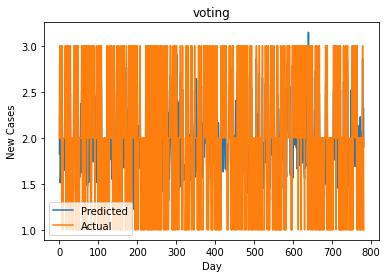

END MODEL



In [37]:
model = ModelCreator(train, target, test_split_available=True, test_size=0.2, estimator='randomForest', estimators=['knn', 'lasso', 'linear', 'randomForest'], random_state=rand)

model.train_model('voting', show_train_error=True)